In [1]:
import matplotlib.pyplot as plt
import os
import datetime
import pickle
import numpy as np


class ProgressViewer:
    def __init__(self, create_new_directory=True):
        self.losses = []
        self.rewards = []
        self.epsilons = []

        if create_new_directory:
            self.__path = self.__make_dir()

    def add(self, reward, epsilon, loss):

        self.add_reward(reward)
        self.add_epsilon(epsilon)
        self.add_loss(loss)

        if len(self.rewards) > 99:
            self.__save_array()
            self.rewards = []
            self.epsilons = []
            self.losses = []

    def add_reward(self, value):

        self.rewards.append(value)

    def add_loss(self, value):
        self.losses.append(value)

    def add_epsilon(self, value):
        self.epsilons.append(value)

    def get_rewards(self):
        return self.rewards

    def get_epsilons(self):
        return self.epsilons

    def plot_rewards(self, begin=0, end=-1):
        plt.figure(figsize=(20, 10))
        plt.plot(self.rewards)

    def plot_epsilons(self, begin=0, end=-1):
        plt.figure(figsize=(20, 10))
        plt.plot(self.epsilons)

    def plot_lossess(self, begin=0, end=-1):
        plt.figure(figsize=(20, 10))
        plt.plot(self.losses[begin:end])

    def plot_mean_rewards(self, mean=10):
        plt.figure(figsize=(20, 10))
        mean_rewards = []
        for i in range(0, len(self.rewards) - mean, mean):
            mean_rewards.append(np.mean(self.rewards[i * mean: (i + 1) * mean]))
        plt.plot(mean_rewards)

    def plot(self, path=None):
        """
        отрисовывает график награды, изменения функции потерь и epsilon,
        а также выводит все графики на одном
        """
        x, y, z = self.__load_array(path)

        x1 = np.array(x) / np.max(x)
        y1 = np.array(y) / np.max(y)
        z1 = np.array(z) / np.max(z)

        figure = plt.figure(figsize=(20, 10))
        grid = plt.GridSpec(2, 3)

        

        q1 = figure.add_subplot(grid[0, 0])
        q2 = figure.add_subplot(grid[0, 1])
        q3 = figure.add_subplot(grid[0, 2])
        q4 = figure.add_subplot(grid[1, :3])

        q1.plot(x, color='coral', label='reward')
        q1.legend()

        q2.plot(y, color='coral', label='loss')
        q2.legend()

        q3.plot(z, color='coral', label='epsilon')
        q3.legend()

        q4.plot(x1, color='coral', label='reward')
        q4.plot(y1, color='skyblue', label='loss')
        q4.plot(z1, color='grey', label='epsilon')
        q4.legend()
#         plt.plot(grid)
        self.image = figure

    def __save_array(self):
        """
        сохраняет все массивы в файл чтобы не забиваться память,
        файл создается в директории, созданной методом makedir автоматически
        """
        filename = str(datetime.datetime.now().time()).replace(':', '-') + '.visualiser'
        with open(self.__path + '//' + filename, 'wb') as file:
            pickle.dump([self.rewards,
                         self.epsilons,
                         self.losses
                         ],
                        file)

    def __make_dir(self):
        """
        создает автоматически дмректорию, куда будут сохраняться все файлы лога
        """
        path = 'viewer_log_' + str(datetime.datetime.now())[:16].replace(':', '-')
        os.mkdir(path)
        return path

    def __load_array(self, path=None):
        """
        из директории, созданной makedir, собирает по всем файлам в директории
        единые списки наград, ошибок и эпсилона (для отрисовки)
        """
        if path == None:
            path_to_log = self.__path
        else:
            path_to_log = path

        files = os.listdir(path_to_log)
        res_list = []

        for file in files:
            with open(path_to_log + '//' + file, 'rb') as f:
                var_list = pickle.load(f)
                if len(res_list) == 0:
                    res_list = var_list.copy()
                else:
                    res_list[0] += var_list[0]
                    res_list[1] += var_list[1]
                    res_list[2] += var_list[2]

        return res_list[0], res_list[1], res_list[2]

    def save(self, filename):
        self.image.savefig(filename+'.jpg')

In [2]:
v = ProgressViewer(False)

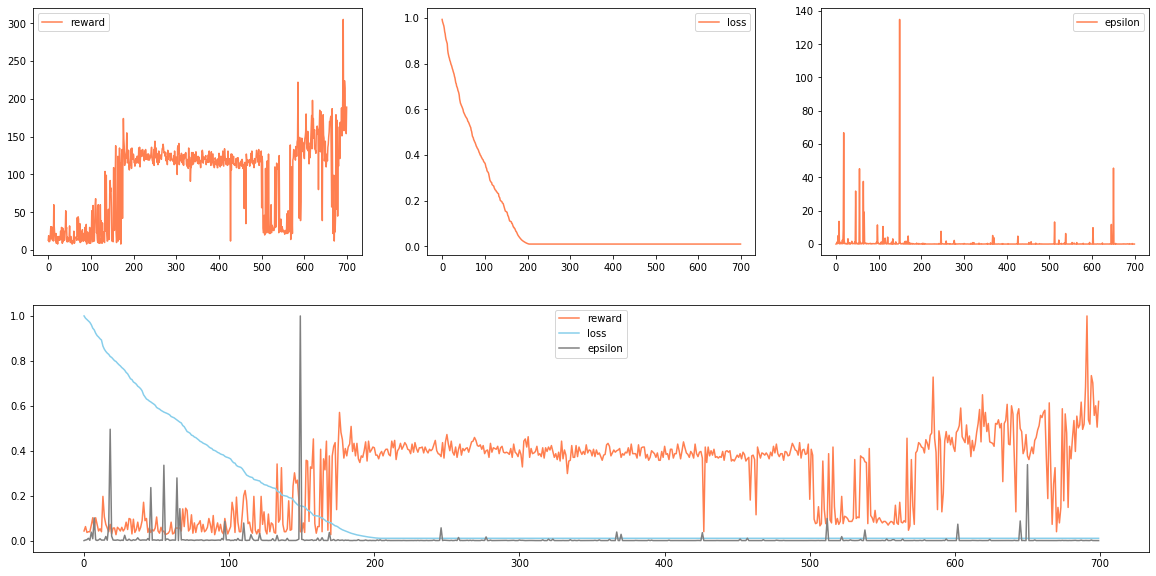

In [11]:
v.plot("C://Users//User//PRACTICE//GIThub//Training_examples//RL//DQN//viewer_log_2020-04-16 22-16")

In [9]:
v.save('1')